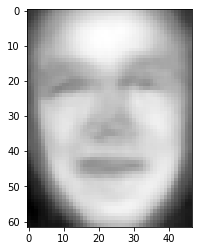

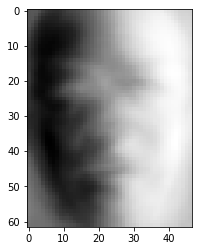

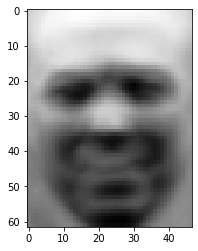

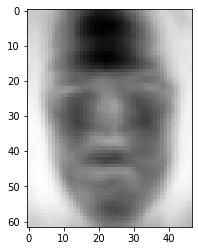

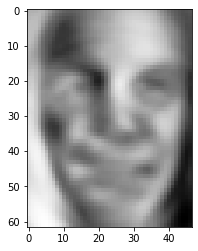

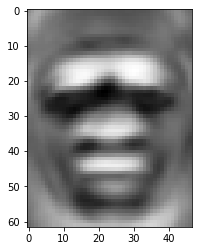

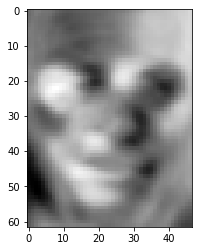

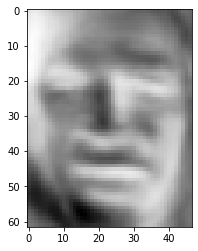

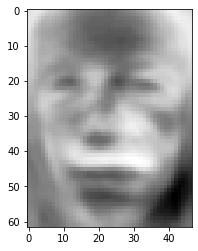

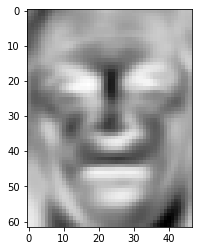

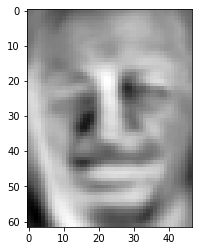

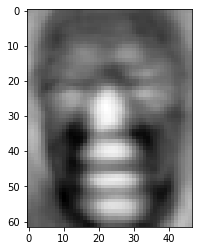

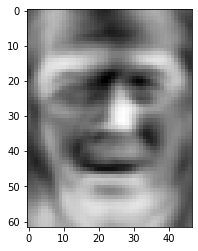

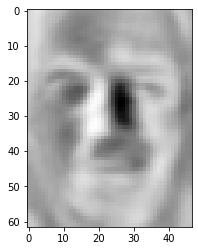

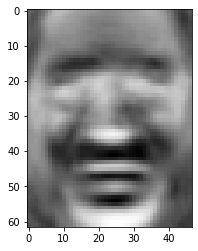

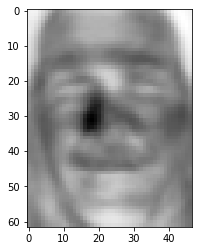

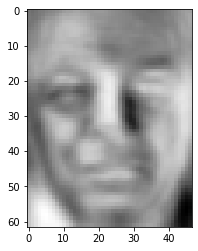

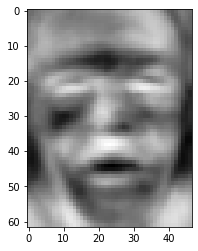

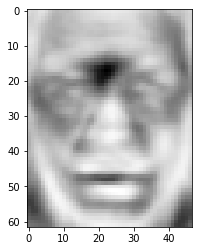

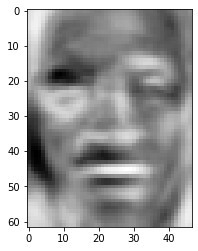

              precision    recall  f1-score   support

           0       0.56      0.77      0.65        69
           1       0.52      0.41      0.46        39
           2       0.70      0.81      0.75       159
           3       0.56      0.15      0.23        34
           4       0.67      0.39      0.49        41

    accuracy                           0.64       342
   macro avg       0.60      0.51      0.52       342
weighted avg       0.63      0.64      0.62       342

32
0.8000191831961274
              precision    recall  f1-score   support

           0       0.54      0.71      0.61        66
           1       0.57      0.45      0.50        38
           2       0.74      0.81      0.78       161
           3       0.59      0.29      0.39        34
           4       0.59      0.44      0.51        43

    accuracy                           0.65       342
   macro avg       0.61      0.54      0.56       342
weighted avg       0.65      0.65      0.64       342



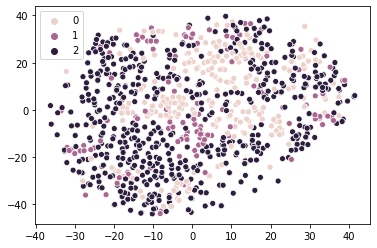

In [1]:
#Atul Kumar Tiwari
#2018CSB1077
# Refrence: Scikit learn documentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


lfw = sklearn.datasets.fetch_lfw_people(min_faces_per_person=100)
lfwdf = pd.DataFrame(data=lfw.data)
xTrain,xTest,yTrain,yTest = train_test_split(lfwdf,lfw.target,test_size=0.3)
lfwdf = StandardScaler().fit_transform(lfwdf)


pca100 = PCA(n_components=100)
pca_xx_on_lfwdf = pca100.fit(lfwdf)

lfw['target_names']

# pca_xx_on_lfwdf.shape

n_components = 100
h,w = lfw.images.shape[1],lfw.images.shape[2]
eigenfaces = pca_xx_on_lfwdf.components_.reshape((n_components, h, w))

for i in range(20):
    plt.imshow(eigenfaces[i],cmap='Greys')
    plt.show()

pca_on_lfwdf = pca100.fit_transform(lfwdf)

##### pca ncomp for 80% data variance

x_train,x_test,y_train,y_test = xTrain,xTest,yTrain,yTest
predata = []
target = []
for i in range(len(lfwdf)):
    if lfw.target[i]==3 or lfw.target[i]==4:
        continue
    predata.append(pca_on_lfwdf[i])
    target.append(lfw.target[i])
####################
predata = np.array(predata)
from sklearn.manifold import TSNE
tsne =  TSNE(n_components=2)
afterTsne = tsne.fit_transform(predata)
sns.scatterplot(
    x=afterTsne[:,0], y=afterTsne[:,1],
    hue=target
)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
pca_xx_on_lfwdf = pca100.fit_transform(lfwdf)
x_train,x_test,y_train,y_test = train_test_split(pca_xx_on_lfwdf,lfw.target,test_size=0.3)
model = knn.fit(x_train,y_train)
predicted_y = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_y))

ss = 0
i = 1
while ss < 0.80 and i<33:
    pcaTemp = PCA(n_components=i).fit(lfwdf)
    ss = sum(pcaTemp.explained_variance_ratio_)
    i+=1
print(i-1)
pcaTemp = PCA(n_components=31).fit(lfwdf)
ss = sum(pcaTemp.explained_variance_ratio_)
print(ss)

pca31 = PCA(n_components=31)
pca_31_on_lfwdf = pca100.fit_transform(lfwdf)
knn = KNeighborsClassifier()
x_train,x_test,y_train,y_test = train_test_split(pca_31_on_lfwdf,lfw.target,test_size=0.3)
model = knn.fit(x_train,y_train)
predicted_y = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_y))

(150, 4)


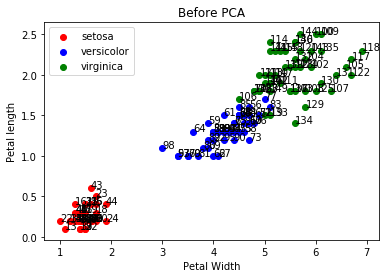

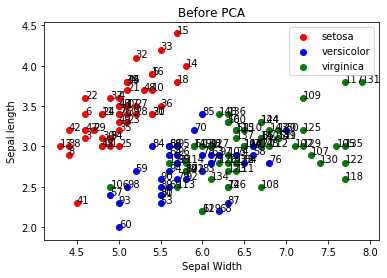

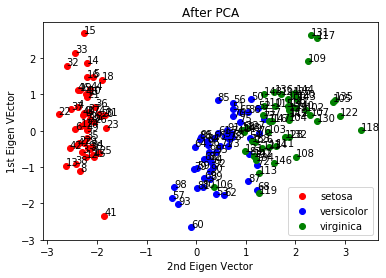

      Sepal Length  Sepal Width  Petal Length  Petal Width
Pca1      0.890169    -0.460143      0.991555     0.964979
Pca2      0.360830     0.882716      0.023415     0.064000
AxesSubplot(0.125,0.125;0.62x0.755)


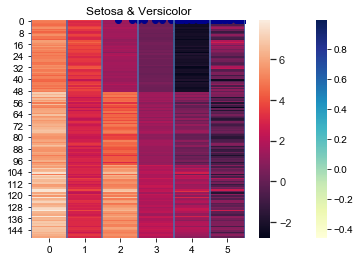

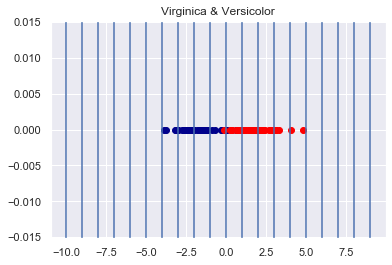

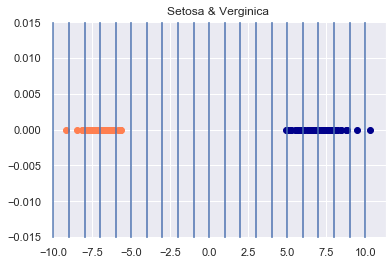

150 150
[[-8.06179978e+00  3.00420621e-01]
 [-7.12868772e+00 -7.86660426e-01]
 [-7.48982797e+00 -2.65384488e-01]
 [-6.81320057e+00 -6.70631068e-01]
 [-8.13230933e+00  5.14462530e-01]
 [-7.70194674e+00  1.46172097e+00]
 [-7.21261762e+00  3.55836209e-01]
 [-7.60529355e+00 -1.16338380e-02]
 [-6.56055159e+00 -1.01516362e+00]
 [-7.34305989e+00 -9.47319209e-01]
 [-8.39738652e+00  6.47363392e-01]
 [-7.21929685e+00 -1.09646389e-01]
 [-7.32679599e+00 -1.07298943e+00]
 [-7.57247066e+00 -8.05464137e-01]
 [-9.84984300e+00  1.58593698e+00]
 [-9.15823890e+00  2.73759647e+00]
 [-8.58243141e+00  1.83448945e+00]
 [-7.78075375e+00  5.84339407e-01]
 [-8.07835876e+00  9.68580703e-01]
 [-8.02097451e+00  1.14050366e+00]
 [-7.49680227e+00 -1.88377220e-01]
 [-7.58648117e+00  1.20797032e+00]
 [-8.68104293e+00  8.77590154e-01]
 [-6.25140358e+00  4.39696367e-01]
 [-6.55893336e+00 -3.89222752e-01]
 [-6.77138315e+00 -9.70634453e-01]
 [-6.82308032e+00  4.63011612e-01]
 [-7.92461638e+00  2.09638715e-01]
 [-7.9912902

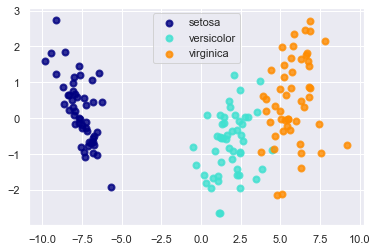

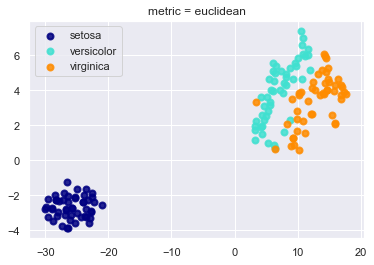

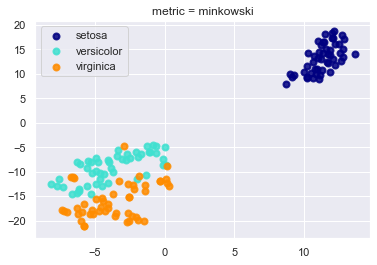

D:\conda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


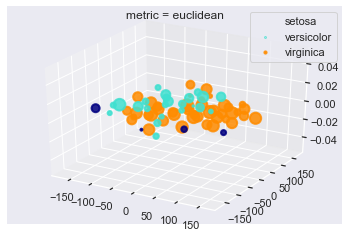

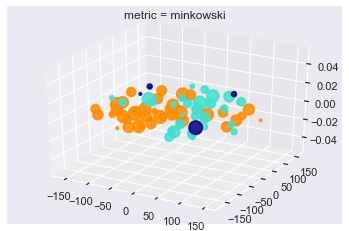

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target)

# iris
irisdata = StandardScaler().fit_transform(iris.data)

import matplotlib.cm as cm
# colors = cm.rainbow(np.linespace(0,1,150))
targ = ('Setosa','Versicolor','Verginica')
print(iris.data.shape)
irdata = iris.data
colors = ['r','b','g']
pca2 = PCA(n_components=2)
irstdized = StandardScaler().fit_transform(irdata)
irisOnPca = pca2.fit_transform(irstdized)


fig, ax = plt.subplots()
a,b = irdata[:,2],irdata[:,3]
for i in range(3):
    plt.scatter(irdata[iris.target==i,2],irdata[iris.target==i,3],c=colors[i],label=iris.target_names[i])
for i in range(150):
    plt.annotate(i,(a[i],b[i]))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Petal Width")
plt.ylabel("Petal length")
plt.title("Before PCA")
plt.show()




fig, ax = plt.subplots()
a,b = irdata[:,0],irdata[:,1]
for i in range(3):
    plt.scatter(irdata[iris.target==i,0],irdata[iris.target==i,1],c=colors[i],label=iris.target_names[i])
for i in range(150):
    plt.annotate(i,(a[i],b[i]))
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel("Sepal Width")
plt.ylabel("Sepal length")
plt.title("Before PCA")
plt.show()
fig, ax = plt.subplots()
a,b = irisOnPca[:,0],irisOnPca[:,1]
for i in range(3):
    plt.scatter(irisOnPca[iris.target==i,0],irisOnPca[iris.target==i,1],c=colors[i],label=iris.target_names[i])
for i in range(150):
#     plt.scatter(irisOnPca[max(i-1,0):i,0],irisOnPca[max(i-1,0):i,1])
    plt.annotate(i,(a[i],b[i]))
plt.xlabel("2nd Eigen Vector")
plt.ylabel("1st Eigen VEctor")
plt.title("After PCA")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()



x =  np.append(irdata,irisOnPca,axis=1)


irdata = StandardScaler().fit_transform(irdata)
dat = {"Sepal Length":irdata[:,0],
             "Sepal Width":irdata[:,1],
             "Petal Length":irdata[:,2], 
             "Petal Width":irdata[:,3],
             "Pca1":irisOnPca[:,0],
             "Pca2":irisOnPca[:,1]
      }
df = pd.DataFrame(data=dat)
dic = {             "Sepal Length":[df['Sepal Length'].corr(df['Pca1']),df['Sepal Length'].corr(df['Pca2'])],
                    "Sepal Width": [df['Sepal Width'].corr(df['Pca1']),df['Sepal Width'].corr(df['Pca2'])],
                    "Petal Length":[df['Petal Length'].corr(df['Pca1']),df['Petal Length'].corr(df['Pca2'])],
                    "Petal Width": [df['Petal Width'].corr(df['Pca1']),df['Petal Width'].corr(df['Pca2'])],
                    }
table = pd.DataFrame(data = dic)
table.rename(index = {0:"Pca1",1:"Pca2"},inplace=True)
print(table)
print(sns.heatmap(table,cmap="YlGnBu"))

import seaborn as sns; sns.set()
# uniform_data = irdata 
ax = sns.heatmap(x)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
targ = ['Setosa','Versicolor','Verginica']
# from sklearn.lda import LDA
lda = LinearDiscriminantAnalysis()
# lda = TSNE(n_components=1)
lda.fit(x_train,y_train)
from sklearn.metrics import classification_report
# pred = lda.predict(x_test)
# print(classification_report(pred,y_test))
x_c01 = irisdata[:100,:]
y_c01 = iris.target[:100]
# x_c02 = iris.data[0:50+100:150,:]
# y_c02 = iris.target[0:50 + 100:150]
x_c12 = irisdata[50:150,:]
y_c12 = iris.target[50:150]

x_c02 = irisdata[0:50,:]
x_c02 = list(x_c02)
temp  = list(irisdata[100:150,:])
for i in temp:
    x_c02.append(i)
x_c02 = np.array(x_c02)
y_c02 = list(iris.target[0:50])
temp = list(iris.target[100:150])
for i in temp:
    y_c02.append(i)
y_c02 = np.array(y_c02)
lda_c01 = lda.fit_transform(x_c01,y_c01)
lda_c02 = lda.fit_transform(x_c02,y_c02)
lda_c12 = lda.fit_transform(x_c12,y_c12)
plt.scatter(lda_c01[:50],np.zeros(50),c='coral')
plt.title("Setosa & Versicolor")
plt.scatter(lda_c01[50:100],np.zeros(50),c='darkblue')
for i in range(-10,10):
    plt.axvline(x = i)
plt.show()
plt.scatter(lda_c12[:50],np.zeros(50),c='darkblue')
plt.scatter(lda_c12[50:100],np.zeros(50),c='red')
plt.title("Virginica & Versicolor")
for i in range(-10,10):
    plt.axvline(x = i)
plt.show()
plt.scatter(lda_c02[:50],np.zeros(50),c='coral')
plt.scatter(lda_c02[50:100],np.zeros(50),c='darkblue')
plt.title("Setosa & Verginica")
for i in range(-10,11):
    plt.axvline(x = i)
plt.show()

x2d = irisdata
y2d = iris.target
print(len(y2d),len(x2d))
# lda = TSNE(n_components=2)
lda_2d = lda.fit_transform(x2d,y2d)
# lda_2d = lda_2d.transform(x2d)
# print((lda_2d))
# lda_obj = lda.fit(lda_2d,y2d)
print(lda_2d)


colors = ['navy', 'turquoise', 'darkorange']
lw = 2
###########
x1 = np.array([np.min(lda_2d[:,0], axis=0), np.max(lda_2d[:,0], axis=0)])
###########
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(lda_2d[y2d == i, 0], lda_2d[y2d == i, 1], color=color, alpha=0.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

# for i, c in enumerate(colors):
#     b, w1, w2 = 0, lda.coef_[i][0], lda.coef_[i][1]
#     y1 = -(b+x1*w1)/w2    
#     plt.plot(x1,y1,c=colors[i])
    
plt.show()

##### Task 2_3

from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

tsne2_eu = TSNE(n_components =2,metric='euclidean',random_state=77)
tsne2_mink=TSNE(n_components=2,metric='minkowski',random_state=77)
afterTsne2eu = tsne2_eu.fit_transform(irstdized)
afterTsne2mink=tsne2_mink.fit_transform(irstdized)


colors = ['navy', 'turquoise', 'darkorange']
lw = 2
###########
x1 = np.array([np.min(afterTsne2eu[:,0], axis=0), np.max(afterTsne2eu[:,0], axis=0)])
###########
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(afterTsne2eu[iris.target == i, 0], afterTsne2eu[iris.target == i, 1], color=color, alpha=0.85, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("metric = euclidean")
plt.show()




x1 = np.array([np.min(afterTsne2mink[:,0], axis=0), np.max(afterTsne2mink[:,0], axis=0)])
###########
target_names = iris.target_names
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(afterTsne2mink[iris.target == i, 0], afterTsne2mink[iris.target == i, 1], color=color, alpha=0.85, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("metric = minkowski")
plt.show()

tsne3eu = TSNE(n_components=3,metric='euclidean',random_state=43)
tsne3mink=TSNE(n_components=3,metric='minkowski',random_state=43)

afT3eu = tsne3eu.fit_transform(irstdized)
afT3mink = tsne3mink.fit_transform(irstdized)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(afT3eu[iris.target == i, 0], afT3eu[iris.target == i, 1],afT3eu[iris.target == i, 2], color=color, alpha=0.85, lw=lw,
                label=target_name)
    
    
    
# ax.scatter(afT3eu[:,0],afT3eu[:,1],afT3eu[:,2],c='red')
plt.title("metric = euclidean")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(afT3mink[:,0],afT3mink[:,1],afT3mink[:,2],c='blue')
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(afT3mink[iris.target == i, 0], afT3mink[iris.target == i, 1],afT3mink[iris.target == i, 2], color=color, alpha=0.85, lw=lw,
                label=target_name)
    
plt.title("metric = minkowski")
plt.show()

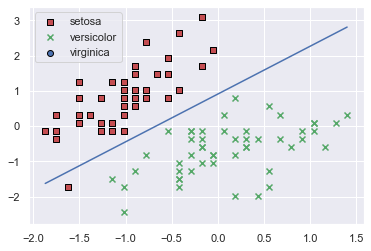

                       Versicolor and Setosa
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



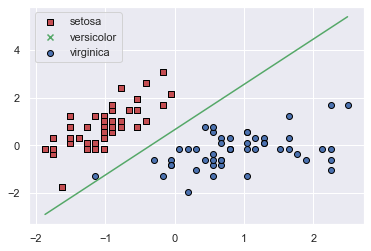

                       Virginica and Setosa
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



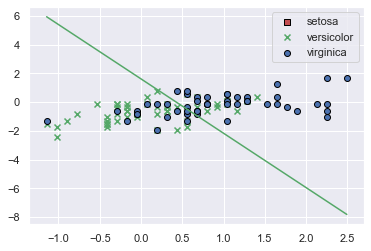

                       Virginica and Versicolor
              precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



                         C = 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.29      0.45        45

    accuracy                           0.29        45
   macro avg       0.33      0.10      0.15        45
weighted avg       1.00      0.29      0.45        45



                         C = 1000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.73      0.65      0.69        17
        

D:\conda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


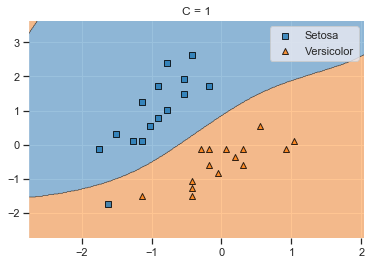

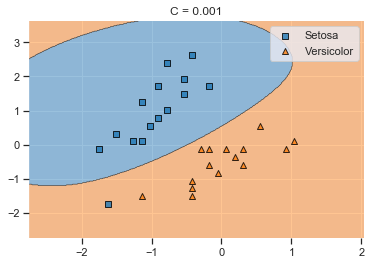

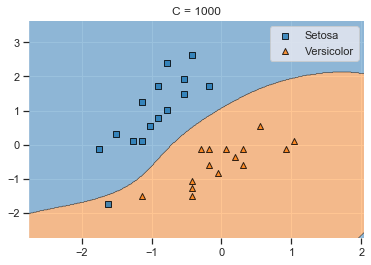



                             C=1
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



                             C=0.001
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



                             C=1000
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg    

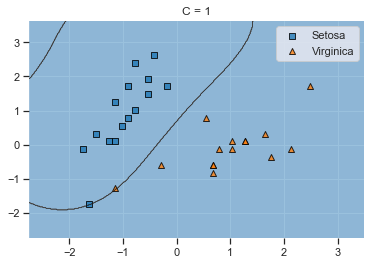

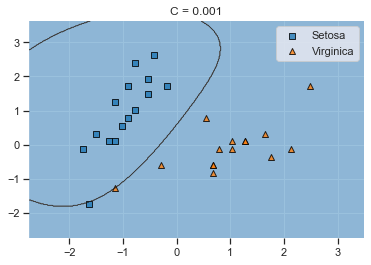

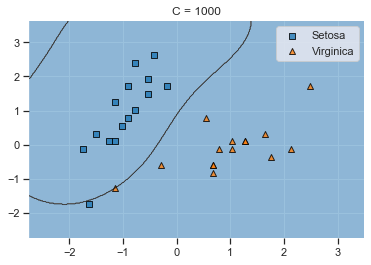



                             C=1
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



                             C=0.001
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



                             C=1000
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg    

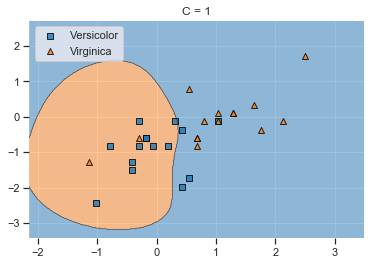

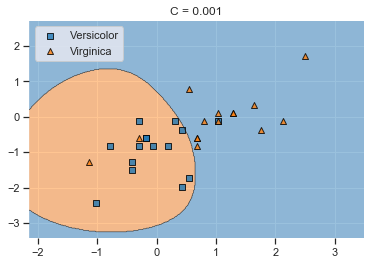

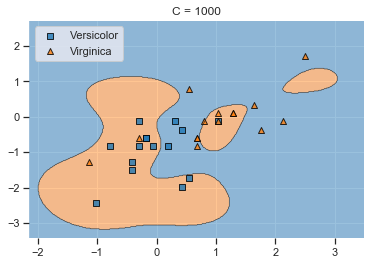



                             C=1
              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.87      0.76      0.81        17

    accuracy                           0.80        30
   macro avg       0.80      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30



                             C=0.001
              precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



                             C=1000
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        18
           2       0.60      0.75      0.67        12

    accuracy                           0.70        30
   macro avg    

In [3]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()

irisdata = iris.data
from sklearn.preprocessing import StandardScaler

irisdata = StandardScaler().fit_transform(irisdata)

irisdata =  irisdata[:,0:2]
iris

irisdata 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(irisdata,iris.target,test_size=0.3,random_state=37)
irisdata_perm = irisdata

x_c01 = irisdata[:100,:]
y_c01 = iris.target[:100]
x_c12 = irisdata[50:150,:]
y_c12 = iris.target[50:150]

x_c02 = irisdata[0:50,:]
x_c02 = list(x_c02)
temp  = list(irisdata[100:150,:])
for i in temp:
    x_c02.append(i)
x_c02 = np.array(x_c02)
y_c02 = list(iris.target[0:50])
temp = list(iris.target[100:150])
for i in temp:
    y_c02.append(i)
y_c02 = np.array(y_c02)

model = SVC(kernel='linear')
trainxc01,testxc01,trainyc01,testyc01 = train_test_split(x_c01,y_c01,test_size=0.3,random_state=37)
trainxc02,testxc02,trainyc02,testyc02 = train_test_split(x_c02,y_c02,test_size=0.3,random_state=37)
trainxc12,testxc12,trainyc12,testyc12 = train_test_split(x_c12,y_c12,test_size=0.3,random_state=37)

model.fit(trainxc01,trainyc01)

model.score(testxc01,testyc01)

iris.target_names

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
for l,c,m in zip([0,1,2],['r','g','b'],['s','x','o']):
    plt.scatter(x_c01[y_c01==l,0],
                x_c01[y_c01==l,1],
                c=c, marker=m, label=iris.target_names[l],edgecolors='black')

x1 = np.array([np.min(x_c01[:,0], axis=0), np.max(x_c01[:,0], axis=0)])
plt.legend(loc='best', shadow=False, scatterpoints=1)

for i, c in enumerate(['b']):
    b, w1, w2 = model.intercept_[i], model.coef_[i][0], model.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)
plt.show()
print("                       Versicolor and Setosa")
print(classification_report(model.predict(testxc01),testyc01))

model.fit(trainxc02,trainyc02)

model.score(testxc02,testyc02)

for l,c,m in zip([0,1,2],['r','g','b'],['s','x','o']):
    plt.scatter(x_c02[y_c02==l,0],
                x_c02[y_c02==l,1],
                c=c, marker=m, label=iris.target_names[l],edgecolors='black')

x1 = np.array([np.min(x_c02[:,0], axis=0), np.max(x_c02[:,0], axis=0)])
plt.legend(loc='best', shadow=False, scatterpoints=1)

for i, c in enumerate(['g']):
    b, w1, w2 = model.intercept_[i], model.coef_[i][0], model.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)
plt.show()
print("                       Virginica and Setosa")
print(classification_report(model.predict(testxc02),testyc02))

model.fit(x_c12,y_c12)

for l,c,m in zip([0,1,2],['r','g','b'],['s','x','o']):
    plt.scatter(x_c12[y_c12==l,0],
                x_c12[y_c12==l,1],
                c=c, marker=m, label=iris.target_names[l],edgecolors='black')

x1 = np.array([np.min(x_c12[:,0], axis=0), np.max(x_c12[:,0], axis=0)])
plt.legend(loc='best', shadow=False, scatterpoints=1)
for i, c in enumerate(['g']):
    b, w1, w2 = model.intercept_[i], model.coef_[i][0], model.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)
plt.show()
print("                       Virginica and Versicolor")
print(classification_report(model.predict(testxc12),testyc12))

x_train ,x_test , y_train, y_test = train_test_split(irisdata,iris.target,test_size=0.3)
from sklearn.metrics import classification_report
for i in [0.001,1000]:
    model = SVC(C=i)
    model.fit(x_train,y_train)
#     print(model.score(x_test,y_test))
    print(f"\n\n                         C = {i}")
    pred = model.predict(x_test)
    print(classification_report(pred,y_test))

newmodel = SVC(kernel='rbf',C=1)
newmodel0001 = SVC(kernel='rbf',C=0.001)
newmodel1000 = SVC(kernel='rbf',C=1000)
from mlxtend.plotting import plot_decision_regions

newmodel.fit(trainxc01,trainyc01)
newmodel0001.fit(trainxc01,trainyc01)
newmodel1000.fit(trainxc01,trainyc01)

import matplotlib.pyplot as plt

plot_decision_regions(testxc01,testyc01, clf=newmodel)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('Versicolor')
# L.get_texts()[2].set_text('Virginica')
plt.title("C = 1")
plt.show()



plot_decision_regions(testxc01,testyc01, clf=newmodel0001)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('Versicolor')
# L.get_texts()[2].set_text('Virginica')
plt.title("C = 0.001")
plt.show()




plot_decision_regions(testxc01,testyc01, clf=newmodel1000)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
L.get_texts()[1].set_text('Versicolor')
# L.get_texts()[2].set_text('Virginica')
plt.title("C = 1000")
plt.show()


print("\n\n                             C=1")
print(classification_report(newmodel.predict(testxc01),testyc01))
print("\n\n                             C=0.001")
print(classification_report(newmodel0001.predict(testxc01),testyc01))
print("\n\n                             C=1000")
print(classification_report(newmodel1000.predict(testxc01),testyc01))

newmodel.fit(trainxc02,trainyc02)
newmodel0001.fit(trainxc02,trainyc02)
newmodel1000.fit(trainxc02,trainyc02)

import matplotlib.pyplot as plt

plot_decision_regions(testxc02,testyc02, clf=newmodel)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
# L.get_texts()[1].set_text('Versicolor')
L.get_texts()[1].set_text('Virginica')
plt.title("C = 1")
plt.show()



plot_decision_regions(testxc02,testyc02, clf=newmodel0001)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
# L.get_texts()[1].set_text('Versicolor')
L.get_texts()[1].set_text('Virginica')
plt.title("C = 0.001")
plt.show()




plot_decision_regions(testxc02,testyc02, clf=newmodel1000)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
L.get_texts()[0].set_text('Setosa')
# L.get_texts()[1].set_text('Versicolor')
L.get_texts()[1].set_text('Virginica')
plt.title("C = 1000")
plt.show()


print("\n\n                             C=1")
print(classification_report(newmodel.predict(testxc02),testyc02))
print("\n\n                             C=0.001")
print(classification_report(newmodel0001.predict(testxc02),testyc02))
print("\n\n                             C=1000")
print(classification_report(newmodel1000.predict(testxc02),testyc02))

newmodel.fit(trainxc12,trainyc12)
newmodel0001.fit(trainxc12,trainyc12)
newmodel1000.fit(trainxc12,trainyc12)

import matplotlib.pyplot as plt

plot_decision_regions(testxc12,testyc12, clf=newmodel)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
# L.get_texts()[0].set_text('Setosa')
L.get_texts()[0].set_text('Versicolor')
L.get_texts()[1].set_text('Virginica')
plt.title("C = 1")
plt.show()



plot_decision_regions(testxc12,testyc12, clf=newmodel0001)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
# L.get_texts()[0].set_text('Setosa')
L.get_texts()[0].set_text('Versicolor')
L.get_texts()[1].set_text('Virginica')
plt.title("C = 0.001")
plt.show()




plot_decision_regions(testxc12,testyc12, clf=newmodel1000)
plt.legend(loc='best', shadow=False, scatterpoints=1)
L = plt.legend()
# L.get_texts()[0].set_text('Setosa')
L.get_texts()[0].set_text('Versicolor')
L.get_texts()[1].set_text('Virginica')
plt.title("C = 1000")
plt.show()


print("\n\n                             C=1")
print(classification_report(newmodel.predict(testxc12),testyc12))
print("\n\n                             C=0.001")
print(classification_report(newmodel0001.predict(testxc12),testyc12))
print("\n\n                             C=1000")
print(classification_report(newmodel1000.predict(testxc12),testyc12))